Simple Linear Regression

What is Linear Regression?
Linear Regression is a basic machine learning algorithm used to predict a numeric value based on the relationship between variables.

🧠 Formula:


Load and Inspect Data

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check for null values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


One-Hot Encode CAtegorical Variables

In [ ]:
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


Feature and Target Separation

In [ ]:
x=df_encoded.drop("charges",axis=1)
y=df_encoded["charges"]

Feature Scaling using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

Train-Test Split

Explanation:


*  train_test_split() divides the data:
*  X_test, y_test: used to test the model
*   X_test, y_test: used to test the model
*  Parameters:
*   test_size=0.2: 20% of data goes to test set.
* random_state=42: ensures repeatable results (random shuffling is fixed).

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

The Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


Make Predictions

In [ ]:
y_pred=model.predict(x_test)

Evaluate Model

Explanation:
*  mean_squared_error(y_test, y_pred):
* Measures average squared error.
* Closer to 0 is better.
* r2_score(y_test, y_pred):
* Tells how much of the variance in target variable is explained by the model.
* Closer to 1 is better.

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

Visualize Predictions vs Actual

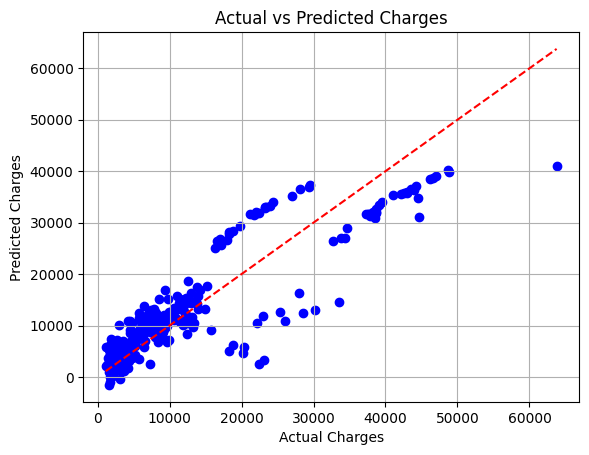

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.grid(True)
plt.show()